In [ ]:
# Program Evaluation Problem Set 4 Question 1 to Question 4

In [2]:
import sys
sys.path.append('/Users/apple/GitHub/machine_learning_works/hw3')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from explore import *
from preprocess import *
from generate_feature import *

%matplotlib inline
sns.set_context("talk")
sns.set_style("whitegrid")

In [3]:
df = pd.read_stata('almond_etal_2008.dta')

In [4]:
df.columns.tolist()

['yob',
 'yod',
 'staters',
 'mom_age',
 'mom_race',
 'mom_ed',
 'mom_ed1',
 'mom_ed2',
 'mom_ed3',
 'mom_ed4',
 'mom_ed5',
 'bweight',
 'gest',
 'gest_wks1',
 'gest_wks2',
 'gest_wks3',
 'gest_wks4',
 'agedth',
 'agedth1',
 'agedth2',
 'agedth3',
 'agedth4',
 'agedth5',
 'nprenatal',
 'nprenatal_1',
 'nprenatal_2',
 'nprenatal_3',
 'nprenatal_4',
 'apgar5',
 'apgar5_1',
 'apgar5_3',
 'apgar5_5',
 'apgar5_7',
 'stateoc',
 'dad_age',
 'dad_race',
 'sex',
 'plural',
 'mom_origin',
 'dad_origin',
 'tot_order',
 'live_order',
 'pldel',
 'attend']

In [5]:
# Q1: Look at the mean, std., min, and max of birth weight ('bweight').
bw_mean = df.bweight.mean()
bw_std = df.bweight.std()
bw_min = df.bweight.min()
bw_max = df.bweight.max()
print ('Statistics of birth weight')
print ('Mean: {:.3f}'.format(bw_mean))
print ('Std.: {:.3f}'.format(bw_std))
print ('Min: {}'.format(bw_min))
print ('Max: {}'.format(bw_max), '\n')
print (df.bweight.describe())

Statistics of birth weight
Mean: 1511.576
Std.: 89.016
Min: 1350
Max: 1650 

count    376408.000000
mean       1511.575647
std          89.016143
min        1350.000000
25%        1445.000000
50%        1515.000000
75%        1588.000000
max        1650.000000
Name: bweight, dtype: float64


In [6]:
# Q2: Plot binned birth weight against mortality rates (One year and 28 days) 
bins = np.arange(bw_min, bw_max, 28.35)
df['bweight_binned'] = pd.cut(df.bweight, bins)
df.head()

,yob,yod,staters,mom_age,mom_race,mom_ed,mom_ed1,mom_ed2,mom_ed3,mom_ed4,...,dad_race,sex,plural,mom_origin,dad_origin,tot_order,live_order,pldel,attend,bweight_binned
0,1983,NaN,1,21,black,12.0,0,1,0,0,...,black,2,1,88,88,2.0,2.0,Hospital Births,Physician,"(1350, 1378.35]"
1,1983,NaN,1,34,white,12.0,0,1,0,0,...,white,2,1,88,88,4.0,3.0,Hospital Births,Physician,"(1350, 1378.35]"
2,1983,NaN,10,31,white,12.0,0,1,0,0,...,white,2,1,88,88,4.0,3.0,Hospital Births,Physician,"(1350, 1378.35]"
3,1983,NaN,1,18,black,11.0,1,0,0,0,...,other,2,1,88,88,1.0,1.0,Hospital Births,Physician,"(1350, 1378.35]"
4,1983,NaN,1,17,black,9.0,1,0,0,0,...,other,2,1,88,88,2.0,2.0,Hospital Births,Physician,"(1350, 1378.35]"


In [20]:
def lmplot_df(df, x='bweight', fit_reg=False, ylabel='Mortality Rates', y='agedth4', title='28 Days Mortality Rates'):
    '''
    Plot two columns of a dataframe.
    '''
    lm = sns.lmplot(x, y,
           data=df,
           x_bins=bins,
           aspect=2,
           fit_reg=fit_reg,
           x_ci='ci',
           ci=95,
           truncate=True,
           scatter_kws={"s": 100},
           palette='Greys')
    lm.set(xlim=(1350, 1650))
    plt.title(title, y=1.08, fontsize=28)
    plt.xlabel('Birth Weight', x=.94)
    plt.ylabel(ylabel, y=.85)
    plt.axvline(1500, color='#32749F', linewidth=1)

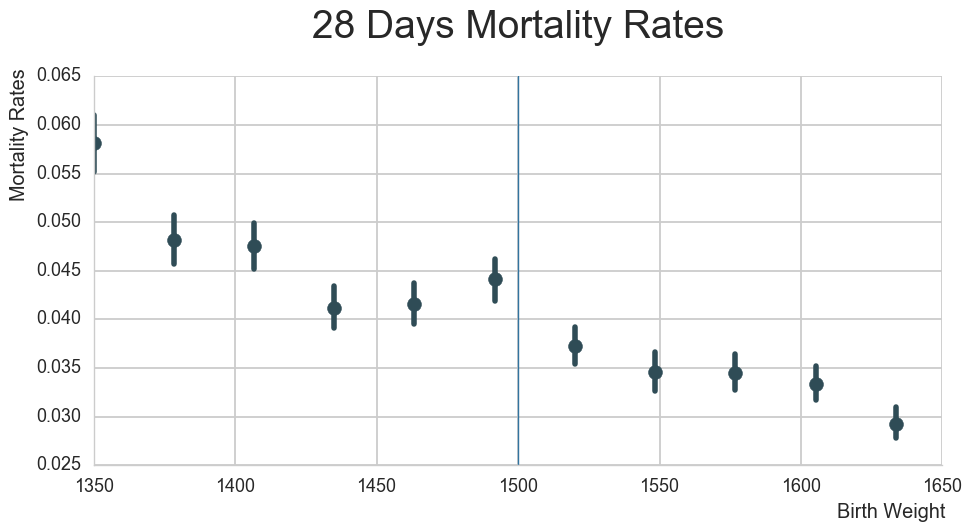

In [17]:
lmplot_df(df, x='bweight', y='agedth4')

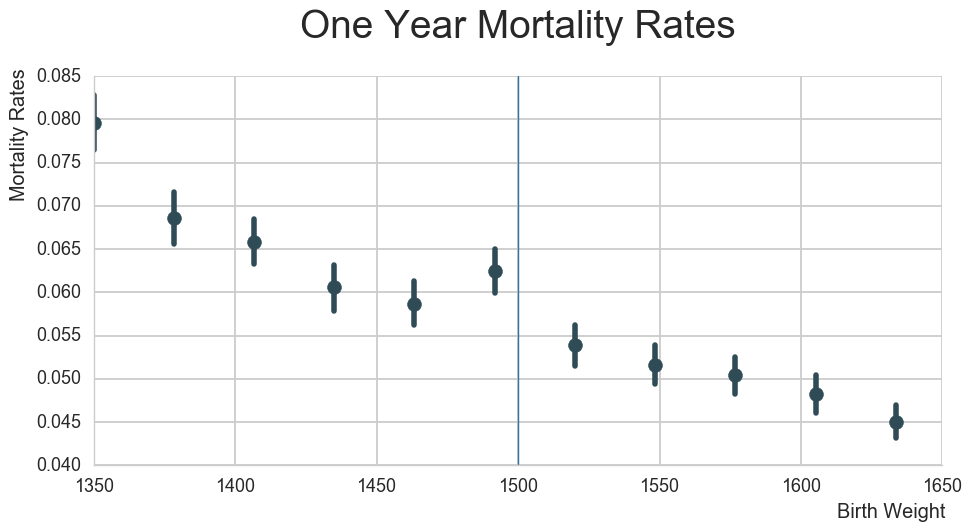

In [18]:
lmplot_df(df, x='bweight', y='agedth5', title='One Year Mortality Rates')

In [8]:
# df.groupby(['bweight_binned']).agedth4.mean()
# df.groupby(['bweight_binned']).agedth5.mean()

In [9]:
print('size of each bin:')
print(df.groupby(['bweight_binned']).size(), '\n')
print('standard deviation of 28 days mortality:')
print(df.groupby(['bweight_binned']).agedth4.std(), '\n')
print('standard deviation of one year mortality:')
print(df.groupby(['bweight_binned']).agedth5.std())

size of each bin:
bweight_binned
(1350, 1378.35]      28167
(1378.35, 1406.7]    29968
(1406.7, 1435.05]    30934
(1435.05, 1463.4]    31332
(1463.4, 1491.75]    33902
(1491.75, 1520.1]    35796
(1520.1, 1548.45]    33049
(1548.45, 1576.8]    35166
(1576.8, 1605.15]    41279
(1605.15, 1633.5]    38304
dtype: int64 

standard deviation of 28 days mortality:
bweight_binned
(1350, 1378.35]      0.230518
(1378.35, 1406.7]    0.217714
(1406.7, 1435.05]    0.206879
(1435.05, 1463.4]    0.203056
(1463.4, 1491.75]    0.194146
(1491.75, 1520.1]    0.205283
(1520.1, 1548.45]    0.188704
(1548.45, 1576.8]    0.182351
(1576.8, 1605.15]    0.187192
(1605.15, 1633.5]    0.173784
Name: agedth4, dtype: float64 

standard deviation of one year mortality:
bweight_binned
(1350, 1378.35]      0.266773
(1378.35, 1406.7]    0.255502
(1406.7, 1435.05]    0.243325
(1435.05, 1463.4]    0.241415
(1463.4, 1491.75]    0.231202
(1491.75, 1520.1]    0.241192
(1520.1, 1548.45]    0.224784
(1548.45, 1576.8]    0.2207

(1350.0, 1650.0000000000002, 0.0, 41347.0)

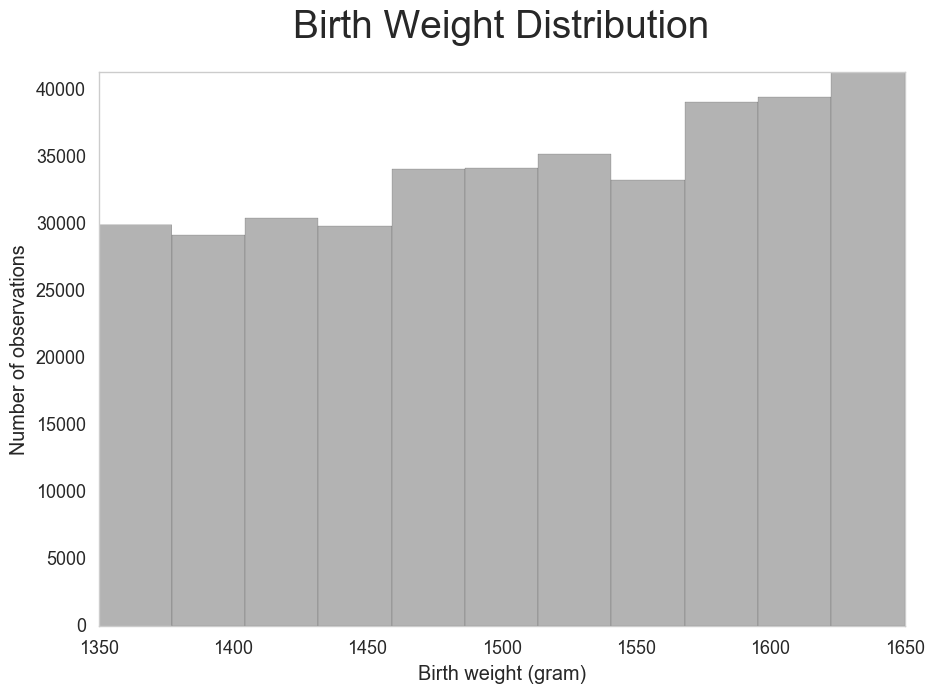

In [12]:
df.bweight.hist(bins=11, color='.7', grid=False, linewidth=0.1) # 11 bins is by ounce
plt.title('Birth Weight Distribution', y=1.05, fontsize=28)
plt.xlabel('Birth weight (gram)')
plt.ylabel('Number of observations')
plt.axis('tight') # to set xlim & ylim to range

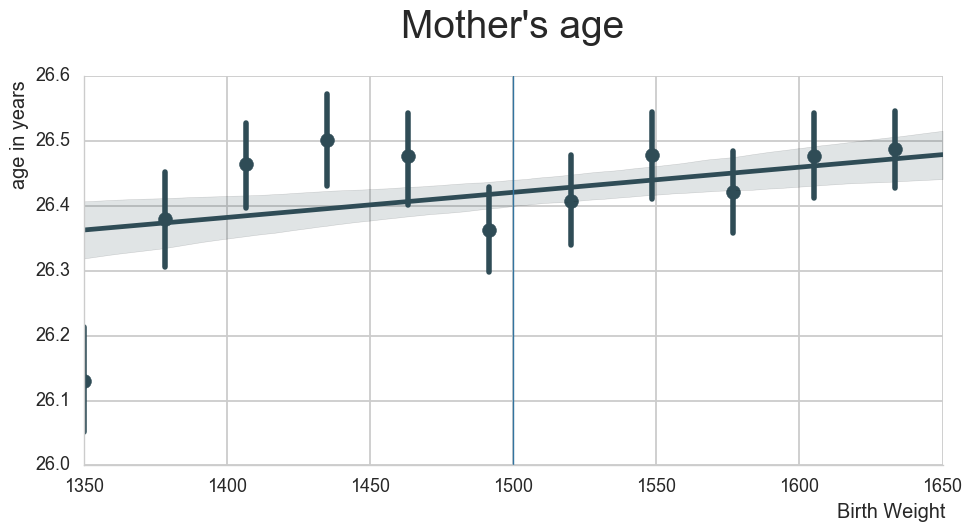

In [21]:
# Q4
# Plotting mother's age
lmplot_df(df, x='bweight', y='mom_age', ylabel='Age in years', fit_reg=True, title="Mother's age")

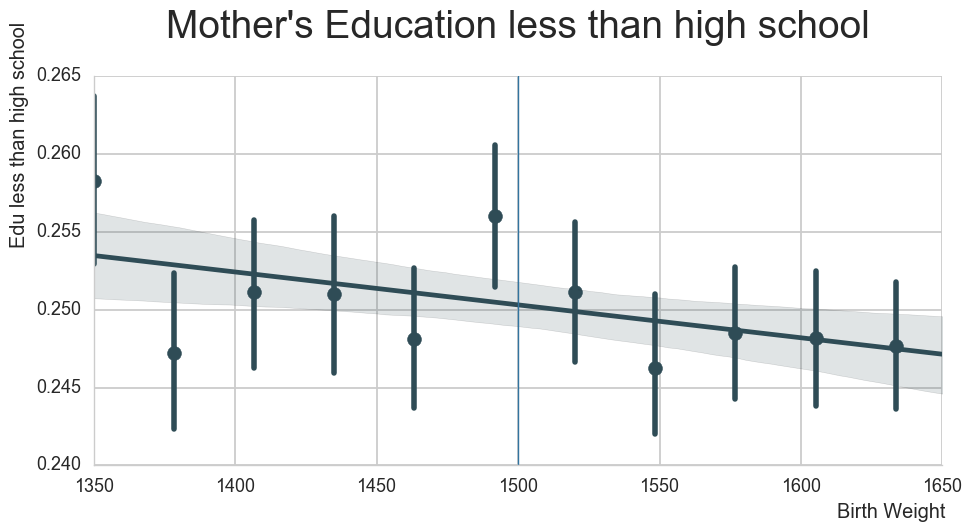

In [22]:
# Plotting mother's education less than high school, 1 represents yes; 0 represents no.
lmplot_df(df, x='bweight', y='mom_ed1', ylabel='Edu less than high school', fit_reg=True, title="Mother's Education less than high school")

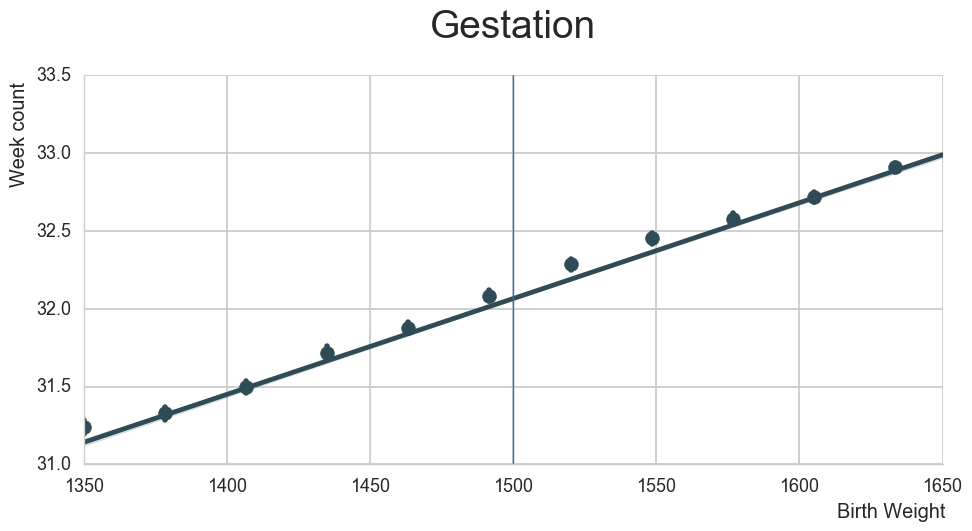

In [24]:
# Plotting Gestation (weeks)
lmplot_df(df, x='bweight', y='gest', ylabel='Week count', fit_reg=True, title="Gestation")

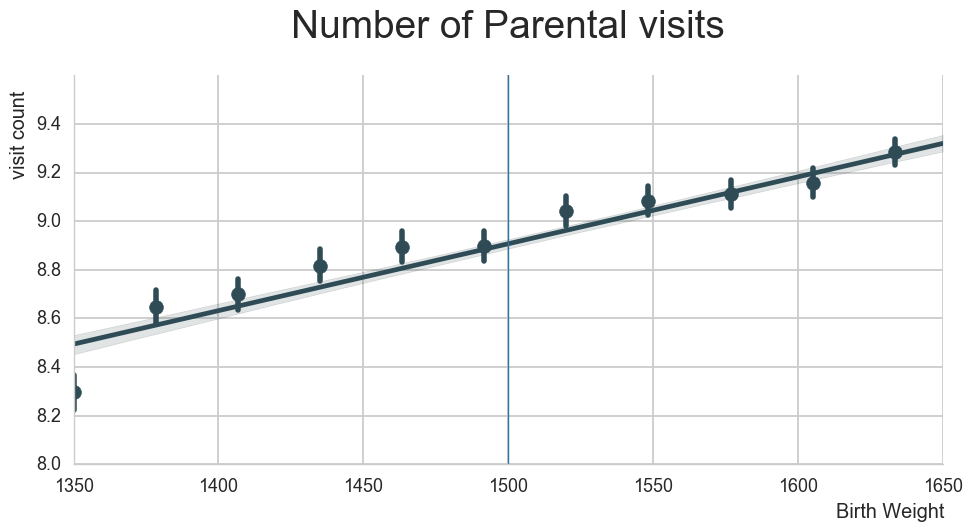

In [25]:
# Plotting Parental care visits
lmplot_df(df, x='bweight', y='nprenatal', ylabel='visit count', fit_reg=True, title="Number of Parental visits")

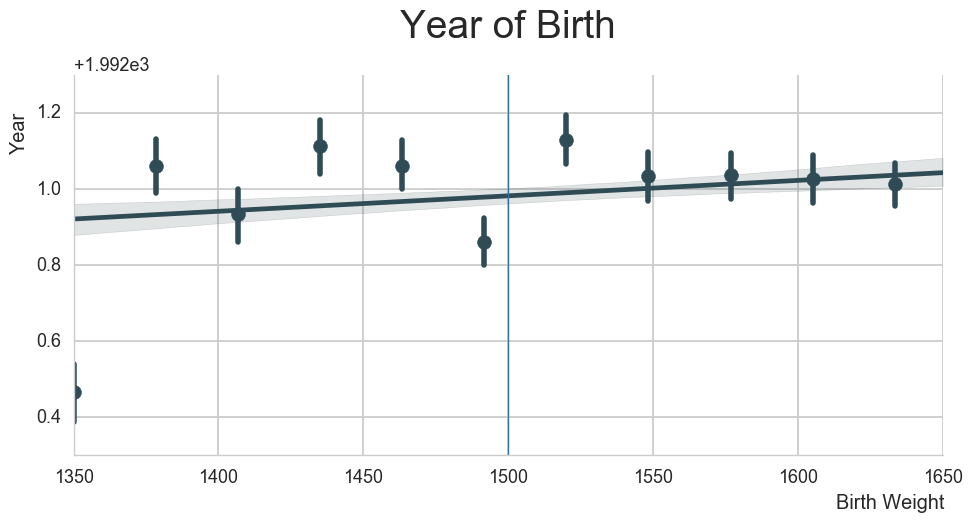

In [26]:
# Plotting Year of birth
lmplot_df(df, x='bweight', y='yob', ylabel='Year', fit_reg=True, title="Year of Birth")

In [ ]:
# I used Stata for the rest of Questions(Q5-Q7)